In [1]:
%pylab inline
import gensim
from sklearn.decomposition import PCA
import nltk

Populating the interactive namespace from numpy and matplotlib


In [2]:
import wikipedia

In [3]:
wikipedia.set_lang("pt")
text = wikipedia.page("Pernambuco").content.splitlines()

In [4]:
stop_words = nltk.corpus.stopwords.words("portuguese")

In [5]:
corpus = []

for t in text:
    if len(t) > 0:
        new_t = gensim.utils.simple_preprocess(t)
        new_t = [i for i in new_t if i not in stop_words]
        corpus.append(new_t)

In [6]:
len(corpus)

142

In [7]:
dictionary = gensim.corpora.Dictionary(corpus)

In [8]:
dictionary.token2id["pernambuco"]

34

In [9]:
corpus_ids = [dictionary.doc2bow(i) for i in corpus]

In [10]:
corpus_ids[1][:10]

[(8, 2),
 (31, 1),
 (32, 2),
 (34, 4),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1)]

In [11]:
# sg=1 ~> skip-gram mode, if sg=0 ~> cbow mode

model_sg = gensim.models.Word2Vec(corpus, min_count=1, window=2, compute_loss=True, sg=1) 
model_sg.train(corpus, total_examples=len(corpus), epochs=100)

model_cb = gensim.models.Word2Vec(corpus, min_count=1, window=2, compute_loss=True, sg=0) 
model_cb.train(corpus, total_examples=len(corpus), epochs=100)

(763662, 801300)

In [12]:
words = list(model_cb.wv.vocab)
words[:10]

['pernambuco',
 'unidades',
 'federativas',
 'brasil',
 'localizado',
 'centro',
 'leste',
 'região',
 'nordeste',
 'limites']

In [13]:
model_sg["recife"]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.32163063,  0.73345965,  0.24051909, -0.5845181 ,  0.19288465,
        1.0017765 ,  0.7383426 , -0.40575045,  0.3097038 , -0.26649466,
        0.12094432, -0.04414282, -0.45160082, -0.17004323, -0.778246  ,
        0.18753283,  0.07451915, -0.06832795, -0.6199313 , -0.20955773,
       -0.56701905,  0.08792193, -0.3316485 ,  0.14098181, -0.9257372 ,
        0.01716528, -0.31305754, -0.18632984,  0.79562217,  0.76405746,
        0.64874214, -0.31615123,  0.24617437, -0.3334853 ,  0.6746203 ,
        0.13253078,  0.59455323, -0.07449969, -0.02870202, -0.01444033,
        0.61070246,  0.2873928 ,  0.16318288,  0.19154699,  0.42938557,
       -0.63487554,  0.2795591 ,  0.47808424,  0.2853356 , -0.1147148 ,
       -0.2855053 , -0.6053203 ,  1.0188168 , -0.69486296,  0.21366516,
        1.0254682 , -0.63540107, -0.76335955, -0.8666782 ,  0.05607316,
        0.11648492, -0.23771925,  0.09386083, -0.8990407 ,  0.24699084,
       -0.06608992, -0.21657424, -0.0889007 , -0.4491644 , -0.04

In [14]:
X_sg = model_sg[model_sg.wv.vocab]
X_cb = model_cb[model_cb.wv.vocab]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [15]:
(X_cb.shape, X_sg.shape)

((3472, 100), (3472, 100))

In [16]:
pca_sg = PCA(n_components=2)
result_sg = pca_sg.fit_transform(X_sg)

pca_cb = PCA(n_components=2)
result_cb = pca_cb.fit_transform(X_cb)

In [17]:
result_sg.shape

(3472, 2)

In [18]:
import altair as alt
import pandas as pd

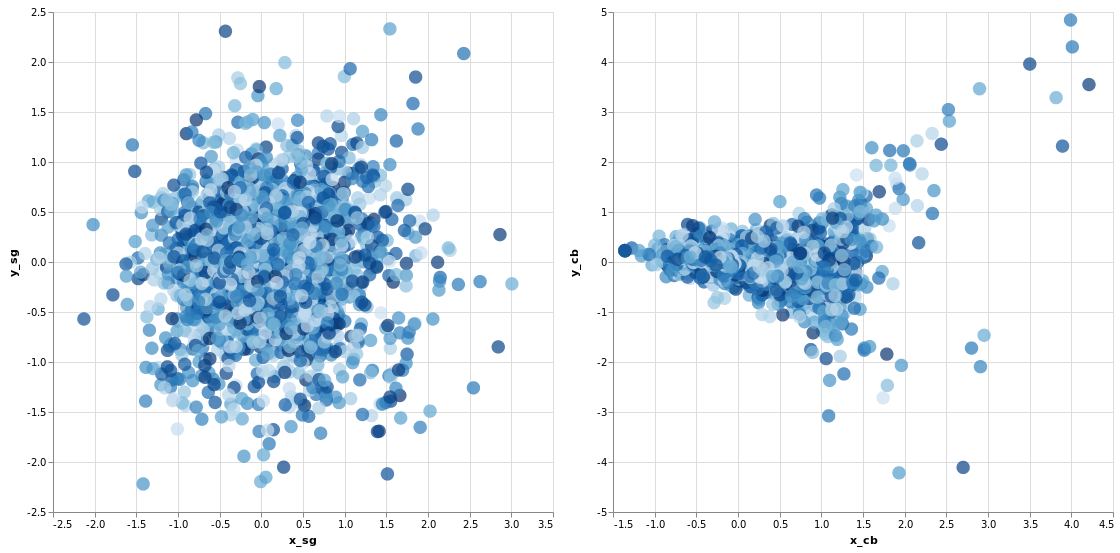

In [27]:
alt.themes.enable('opaque')
alt.renderers.enable('jupyterlab')

selector = alt.selection_multi(empty='all', fields=['label'])
base = alt.Chart(pd.DataFrame({
        "x_sg" : result_sg[:, 0],
        "y_sg" : result_sg[:, 1],
        "x_cb" : result_cb[:, 0],
        "y_cb" : result_cb[:, 1],
        "label" : words
    })).properties(
        width=500,
        height=500
    ).add_selection(selector)

c1 = base.mark_circle(size=180).encode(
        x="x_sg",
        y="y_sg",
        tooltip="label",
        color=alt.condition(selector, 'label:O', alt.value('lightgray'), legend=None)
    )

c2 = base.mark_circle(size=180).encode(
        x="x_cb",
        y="y_cb",
        tooltip="label",
        color=alt.condition(selector, 'label:O', alt.value('lightgray'), legend=None)
    )

c1|c2

In [24]:
w = "cozido"

for i in zip(model_sg.wv.similar_by_word("cozido"), model_cb.wv.similar_by_word("cozido")):
    print(i[0][0],"\t" , i[1][0])


moqueca 	 moqueca
peixada 	 abastados
chambaril 	 doces
caldeirada 	 qualidade
cavalos 	 insatisfeita
culminando 	 cavalos
abastados 	 nobreza
implicados 	 livro
doçaria 	 chambaril
confederação 	 doçaria


/home/lincoln/.local/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [21]:
model_sg.wv.most_similar_cosmul(w)

[('moqueca', 0.998511016368866),
 ('peixada', 0.9981247186660767),
 ('chambaril', 0.9967615008354187),
 ('caldeirada', 0.9932525157928467),
 ('cavalos', 0.9905533790588379),
 ('culminando', 0.9847503900527954),
 ('abastados', 0.977689802646637),
 ('implicados', 0.9735669493675232),
 ('doçaria', 0.9732220768928528),
 ('confederação', 0.9662522673606873)]